# Basic Fashion Classification using Fashion MNIST Dataset
(Dataset taken from TensorFlow)

In [3]:
# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
# Import fashion_mnist dataset from tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist

# Initialize training and testing images and labels
(train_img, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

In [176]:
# Since the dataset outputs values from 0 to 9 (corresponding to a different type of clothing), 
# make a dictionary to turn the integer values into the clothing values
clothing_names = {
    0:'T-shirt/top', 
    1:'Trouser', 
    2:'Pullover', 
    3:'Dress', 
    4:'Coat',
    5:'Sandal', 
    6:'Shirt', 
    7:'Sneaker', 
    8:'Bag', 
    9:'Ankle boot'
}

In [179]:
# Preprocess the data from a range of [0,255] to a range of [0, 1]

train_imgs = train_imgs / 255.0

test_imgs = test_imgs / 255.0

In [23]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Turn image into a 1D array instead of a 2D one
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [181]:
# Compile the model using the adam optimizer and a loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [183]:
# Train the model
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6974 - loss: 4.3900
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8138 - loss: 0.5346
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8361 - loss: 0.4582
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8450 - loss: 0.4224
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8521 - loss: 0.4062
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8622 - loss: 0.3888
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8674 - loss: 0.3732
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8726 - loss: 0.3548
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8738 - loss: 0.3479
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8791 - loss: 0.3376
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8761 - loss: 0.3354
Epoch 12/15
1875/1875 ━━━━━━━━

In [186]:
# Check the model accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 654us/step - accuracy: 0.8723 - loss: 0.3880

Test accuracy: 0.8723000288009644


In [187]:
# Get the first prediction
print(f'Prediction: {clothing_names[np.argmax(predictions[0])]}')

# Compare it with the actual classification
print(f'Actual: {clothing_names[test_labels[0]]}')

Prediction: Ankle boot
Actual: Ankle boot


In [188]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(clothing_names[predicted_label],
                                100*np.max(predictions_array),
                                clothing_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

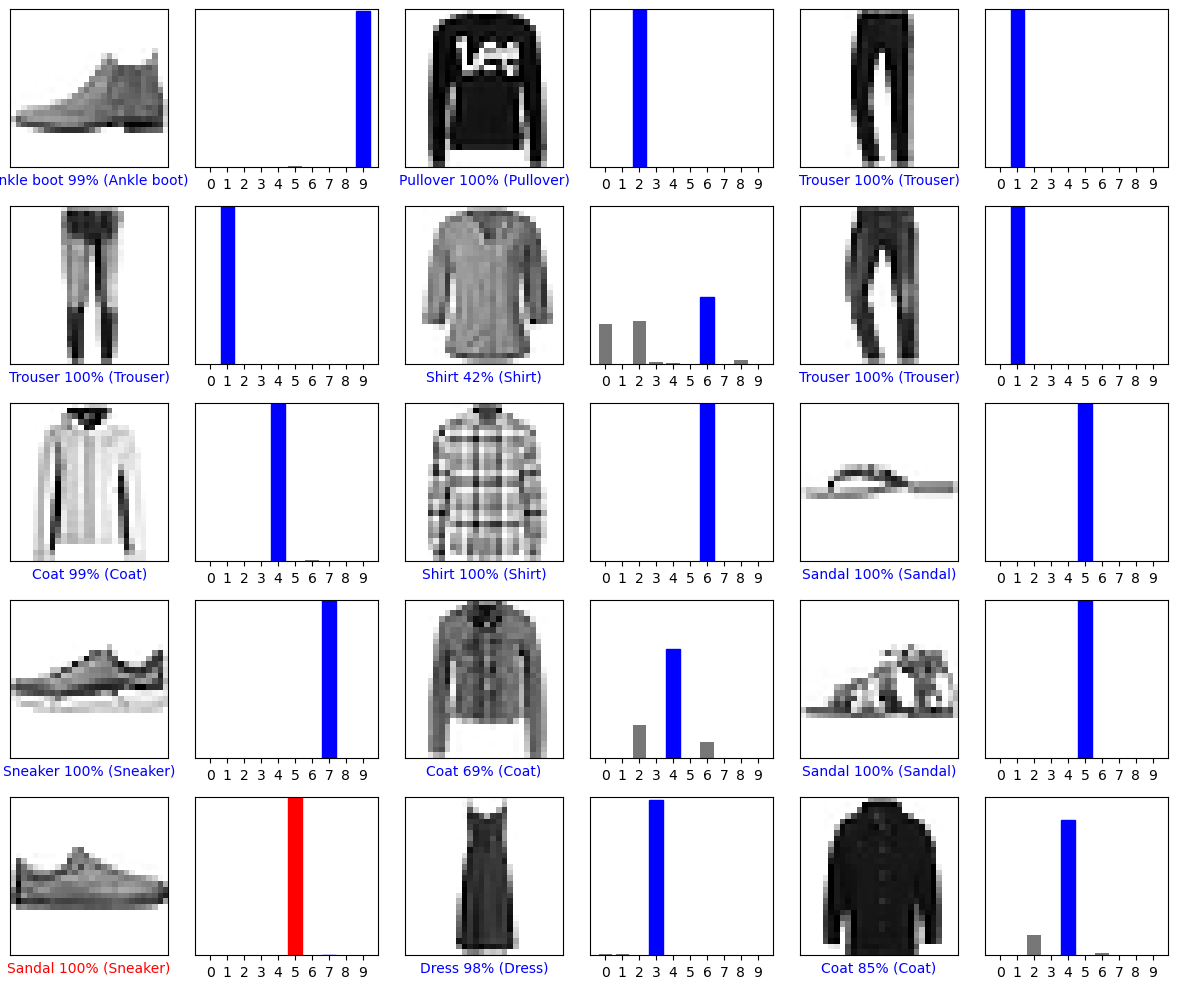

In [189]:
# Plot the first few test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
